In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = [0, 0]
cov = [[10, 0], [0, 100]]  # diagonal covariance

In [3]:
x, y = np.random.multivariate_normal(mean, cov, 5000).T

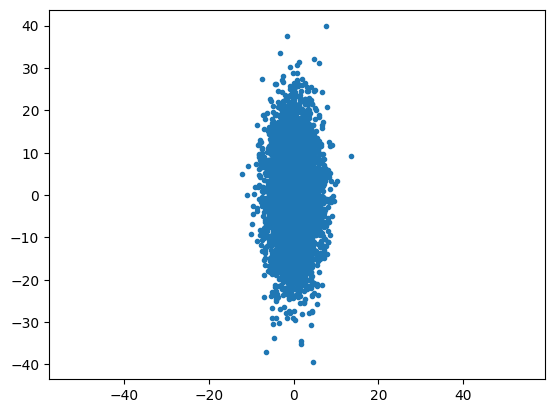

In [4]:
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

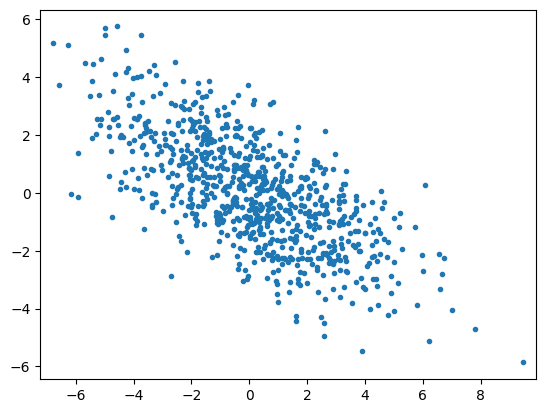

In [6]:
cov = np.array([[6, -3], [-3, 3.5]])  # off-diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, size=800).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [7]:
np.corrcoef(x,y)[0, 1]

-0.6790662332481783

In [5]:
means = [0., 0.]
stds = [1., 1.]
corr = 0.1
cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]

In [7]:
from scipy.stats import multivariate_normal
normal = multivariate_normal(means, cov)

In [12]:
N = 800

In [13]:
normal.rvs(size=N).T

array([[ 1.07076077,  1.03182276, -0.42876341, ...,  1.89399666,
         0.16675483, -1.66963761],
       [ 0.44225375,  1.71585828,  0.48830432, ...,  1.0535911 ,
        -0.27576171,  0.20378364]])

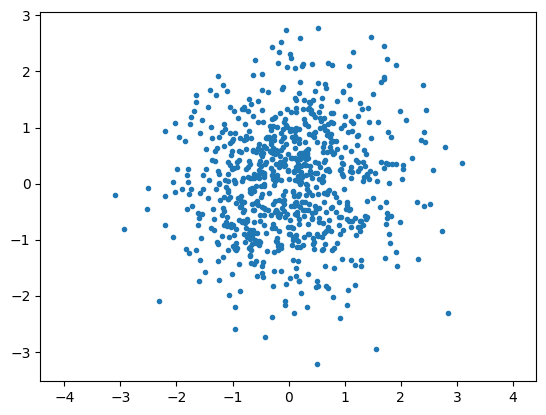

In [14]:
x, y = normal.rvs(size=N).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [10]:
cov

[[1.0, 0.1], [0.1, 1.0]]

In [11]:
xx = np.random.rand(10)

In [18]:
import torch
import sys
sys.path.insert(0, '..')

In [19]:
import src.util as uti

In [20]:
xt = torch.from_numpy(xx).to(uti.device)

NameError: name 'xx' is not defined

In [ ]:
xt

In [ ]:
xt[:3]

In [ ]:
xt[:None]

In [ ]:
xt[None:]

In [21]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.,0.1)]

In [22]:
from scipy.stats import multivariate_normal

In [23]:
def generate_random_variables(N=int(1e5), corr=0., means=[0.0, 0.0], stds=[1.0, 1.0], train_test_split=None):

    cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]
    normal = multivariate_normal(means, cov) 
    A, B = normal.rvs(size=N).T
    A = torch.from_numpy(A).to(uti.device)
    B = torch.from_numpy(B).to(uti.device)

    return A[:train_test_split], B[:train_test_split], A[train_test_split:], B[train_test_split:]

In [24]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.,0.1)]

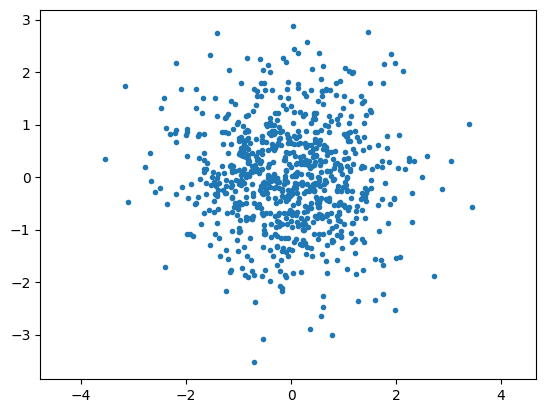

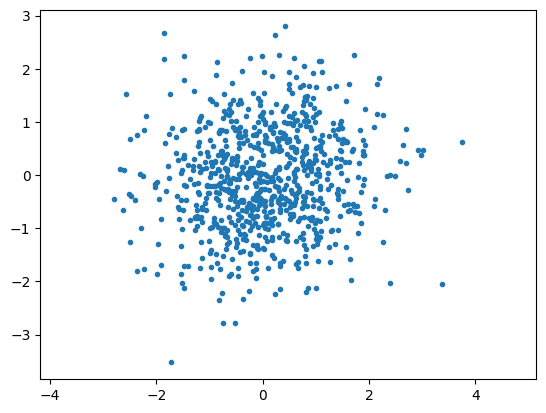

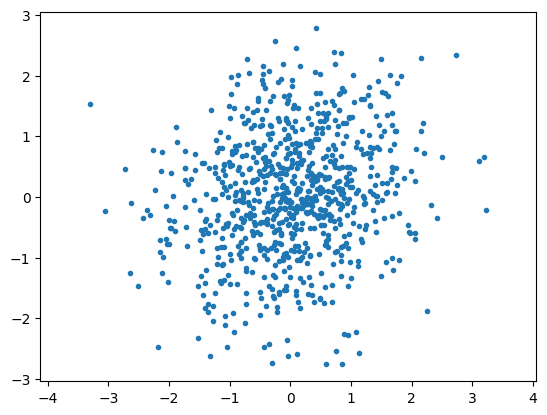

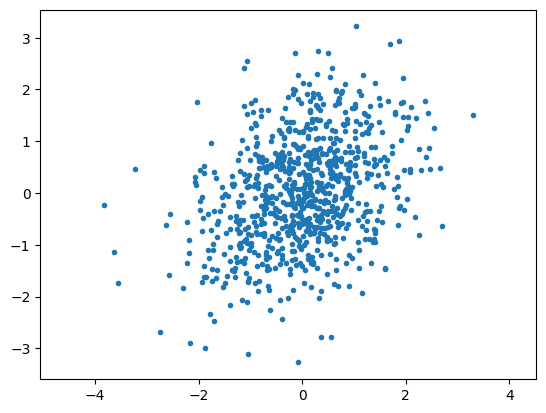

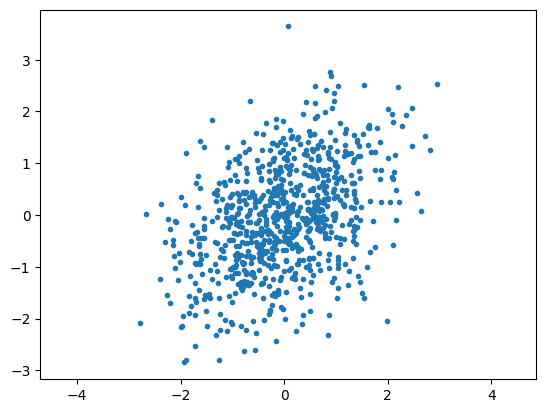

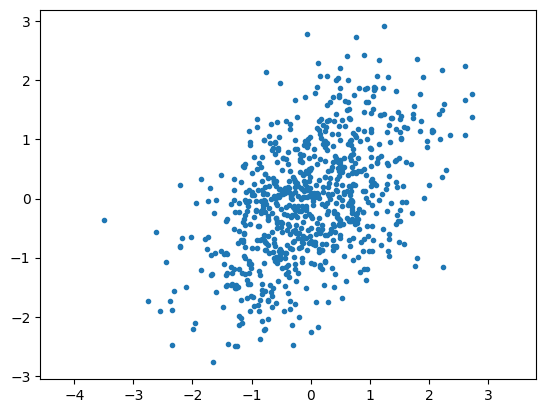

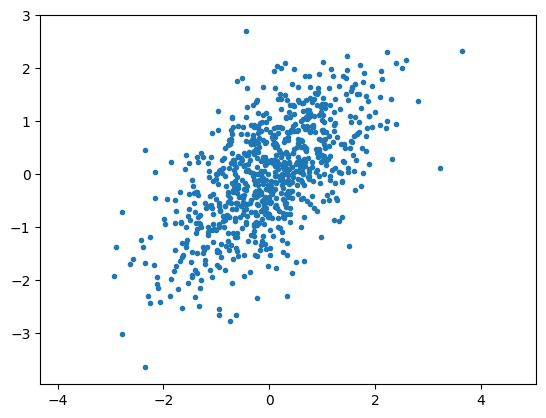

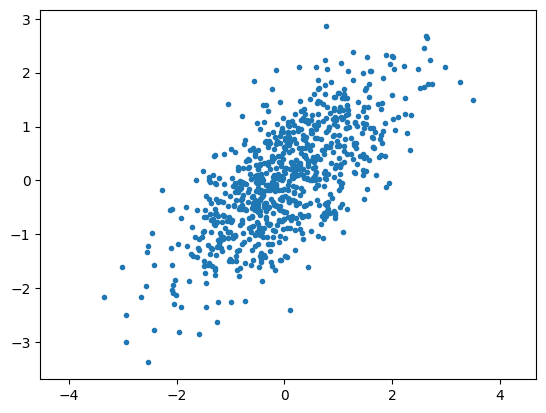

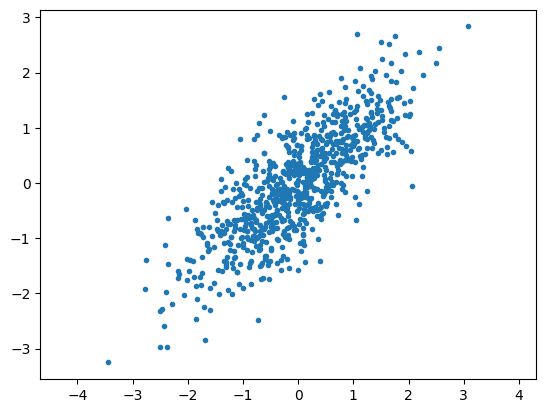

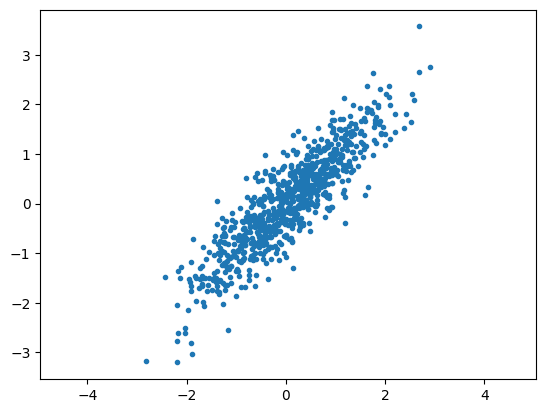

In [25]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    plt.figure()
    plt.plot(A_train, B_train, '.')
    plt.axis('equal')
    plt.show()

In [30]:
from sklearn import feature_selection

In [34]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    mi = feature_selection.mutual_info_regression(A_train.reshape(-1, 1), B_train)
    print(f'corr {corr:.01f}: MI {mi}')

corr 0.0: MI [0]
corr 0.1: MI [0.02509231]
corr 0.2: MI [0.01493014]
corr 0.3: MI [0.02765566]
corr 0.4: MI [0.14083008]
corr 0.5: MI [0.1555369]
corr 0.6: MI [0.2013912]
corr 0.7: MI [0.34485664]
corr 0.8: MI [0.49364367]
corr 0.9: MI [0.82089057]


In [24]:
A_train

tensor([-1.2430e+00,  4.1106e-01, -1.4128e+00,  1.8653e+00, -1.4815e+00,
         1.0691e-01,  2.0504e-01, -2.0757e+00,  1.7405e+00, -1.1299e-01,
        -7.0112e-02, -1.4344e+00, -1.1452e+00, -1.7432e+00,  8.5347e-01,
        -3.9909e-01, -2.0505e-01,  9.7635e-01, -4.5817e-02,  2.8036e+00,
        -1.8809e-01, -3.1637e-01,  1.5449e-01,  1.9864e-01, -3.1852e-01,
        -1.0985e+00,  1.2986e+00, -8.7446e-01,  5.6167e-01,  1.1158e+00,
        -1.6198e+00,  5.0324e-01,  2.0574e+00,  1.0944e+00,  5.1789e-02,
         1.6747e+00, -1.8638e+00,  6.6044e-01, -1.2614e+00,  5.8352e-01,
        -7.4371e-01,  3.4389e-01,  1.1179e+00,  2.2306e-01, -2.3436e+00,
         1.1976e+00, -2.8649e-02, -1.5763e+00, -6.0148e-01, -9.7448e-01,
         1.3271e+00,  2.4753e-01,  6.9325e-01, -2.1251e+00,  6.9244e-01,
         1.9384e-01,  3.7077e-01, -1.9909e+00, -4.0030e-01,  2.5584e-01,
         1.0686e+00,  1.4567e-01,  1.4225e+00,  1.2673e+00,  1.5872e-01,
        -6.2426e-01,  1.5994e+00, -6.8278e-01,  7.2

In [25]:
x, y = np.random.multivariate_normal(means, cov, size=10).T

In [26]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf([1,0])

0.09653235263005393

In [29]:
dir(var)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dist',
 'abseps',
 'allow_singular',
 'cdf',
 'cov',
 'cov_object',
 'dim',
 'entropy',
 'logcdf',
 'logpdf',
 'maxpts',
 'mean',
 'pdf',
 'random_state',
 'releps',
 'rvs']

In [ ]:
import scipy

In [ ]:
n1 = scipy.stats.norm()